# Titanic But Not the James Cameron One!!


In [673]:
#importing necessary modules
import pandas as pd
import numpy as np
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression

In [674]:
#Reading the CSV File and Printing the head Let's Dive in
titanic=pd.read_csv('titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [675]:
#lets Print all the Columns
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [676]:
#Lets get the info of the data
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


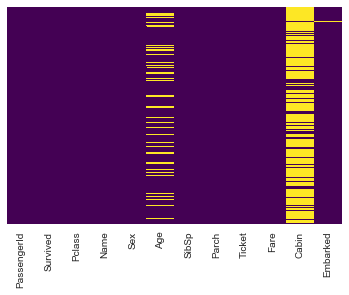

In [677]:
sns.heatmap(titanic.isnull(),cbar=False,yticklabels=False,cmap='viridis')

In [678]:
titanic.drop('Cabin',axis=1,inplace=True,)

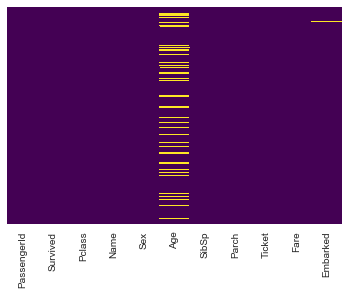

In [679]:
sns.heatmap(titanic.isnull(),cbar=False,yticklabels=False,cmap='viridis')

# Bam!! Cabin dropped
Let's Perform Some EDA,We Will Deal With Null Values Later!!

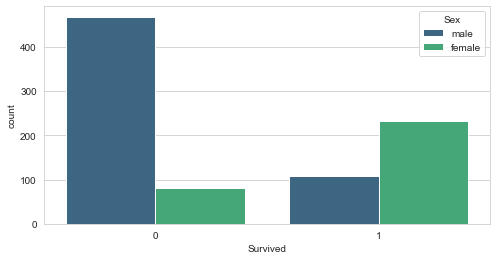

In [680]:
#How many people Survived vs Not Survived
plt.figure(figsize=(8,4))
sns.countplot(x='Survived',data=titanic,hue='Sex',palette='viridis')

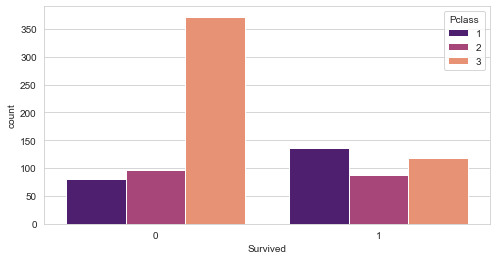

In [681]:
plt.figure(figsize=(8,4))
sns.countplot(x='Survived',data=titanic,hue='Pclass',palette='magma')

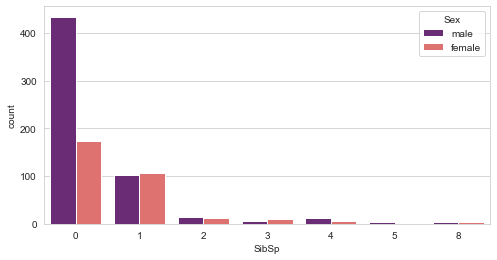

In [682]:
plt.figure(figsize=(8,4))
sns.countplot(x='SibSp',data=titanic,hue='Sex',palette='magma')

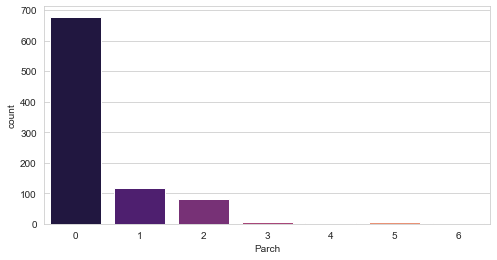

In [683]:
plt.figure(figsize=(8,4))
sns.countplot(x='Parch',data=titanic,palette='magma')

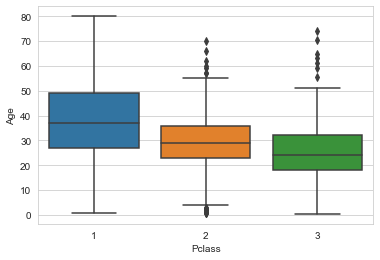

In [684]:
sns.boxplot(x='Pclass',y='Age',data=titanic)

In [685]:
def fill(cols):
    age=cols[0]
    cls=cols[1]
    if(pd.isnull(age)):
        if(cls==1):
            return 39
        elif(cls==2):
            return 30
        else:
            return 25
    else:
        return age

In [686]:
titanic['Age']=titanic[['Age','Pclass']].apply(fill,axis=1)

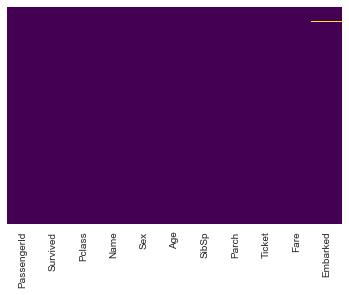

In [687]:
sns.heatmap(titanic.isnull(),cbar=False,yticklabels=False,cmap='viridis')

In [688]:
#Lets Convert the Categorical Values Because Our Accepts only Numeric Values
titanic['Embarked']=titanic['Embarked'].dropna()
embark=pd.get_dummies(titanic['Embarked'],drop_first=True)
sex=pd.get_dummies(titanic['Sex'],drop_first=True)


In [689]:
#lets remove these columns in data frame
titanic.drop(['Embarked','Sex'],inplace=True,axis=1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500


In [690]:
#Now lets Add those Encoded Values
titanic=pd.concat([titanic,embark,sex],axis=1)

In [691]:
#Let's Remove Ticket and Name Column
titanic.drop(['Name','Ticket'],inplace=True,axis=1)

In [692]:
#READY TO GO LETS EXPLORE THE DATA FRAME
titanic.drop('PassengerId',axis=1,inplace=True)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,0,3,22.0,1,0,7.2500,0,1,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,1,0
3,1,1,35.0,1,0,53.1000,0,1,0
4,0,3,35.0,0,0,8.0500,0,1,1


In [693]:
test=pd.read_csv('titanic_test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [694]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [695]:
test['Age']=test[['Age','Pclass']].apply(fill,axis=1)

In [696]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [697]:
test.drop("Cabin",inplace=True,axis=1)

In [698]:
Id=test['PassengerId']
test.drop(['PassengerId','Name','Ticket'],inplace=True,axis=1)

In [699]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [700]:

embar=pd.get_dummies(test['Embarked'],drop_first=True)
se=pd.get_dummies(test['Sex'],drop_first=True)

In [701]:
test['Fare'].fillna(test.Fare.mean(),inplace=True)
test.drop(['Embarked','Sex'],inplace=True,axis=1)
test.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,34.5,0,0,7.8292
1,3,47.0,1,0,7.0000
2,2,62.0,0,0,9.6875
3,3,27.0,0,0,8.6625
4,3,22.0,1,1,12.2875


In [702]:
#Now lets Add those Encoded Values
test=pd.concat([test,embar,se],axis=1)
test['Age']=test['Age'].apply(lambda x:round(x))
test['Fare']=test['Fare'].apply(lambda x:round(x,2))
test.head()

,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,3,34,0,0,7.83,1,0,1
1,3,47,1,0,7.00,0,1,0
2,2,62,0,0,9.69,1,0,1
3,3,27,0,0,8.66,0,1,1
4,3,22,1,1,12.29,0,1,0


In [703]:
X_train=titanic.drop('Survived',axis=1)
y_train=titanic['Survived']
test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Q', 'S', 'male'], dtype='object')

In [704]:
X_test=test[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Q', 'S', 'male']]

In [705]:
#lets split the Data
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
mn=MinMaxScaler()

In [706]:

X_train=mn.fit_transform(X_train)
X_train

array([[1.        , 0.27117366, 0.125     , ..., 0.        , 1.        ,
        1.        ],
       [0.        , 0.4722292 , 0.125     , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.32143755, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [1.        , 0.30887158, 0.125     , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.32143755, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.39683338, 0.        , ..., 1.        , 0.        ,
        1.        ]])

In [707]:
y_train


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [708]:
X_test=mn.fit_transform(X_test)
X_test

array([[1.        , 0.44736842, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [1.        , 0.61842105, 0.125     , ..., 0.        , 1.        ,
        0.        ],
       [0.5       , 0.81578947, 0.        , ..., 1.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.5       , 0.        , ..., 0.        , 1.        ,
        1.        ],
       [1.        , 0.32894737, 0.        , ..., 0.        , 1.        ,
        1.        ],
       [1.        , 0.32894737, 0.125     , ..., 0.        , 0.        ,
        1.        ]])

In [709]:
#Let's Import Our Model and fit the training data
from sklearn.linear_model import LogisticRegression
lgreg=LogisticRegression()
lgreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [710]:
#Lets Predict using X-test
pred=lgreg.predict(X_test)

In [712]:
#We can Perform Feature Engineering inorder to increase our Model Perfomance like Extracting Mr,Ms from Title and so on!


# Thank You!!